# Inferencia estadistica y reconocimiento de patrones - UNAB - 2do cuatrimestre 2021

## Trabajo práctico 2: Bayes Ingenuo

### Pablo Moreira


### Cargo librerías y configuración inicial de gráficos

In [1]:
import numpy as np #manejo de arreglos
import matplotlib.pyplot as plt #gráficos
from sklearn import datasets #conjuntos de datos
from sklearn.decomposition import PCA #Componentes principales
import pandas as pd #manejo de arreglos, parecido al dataframe de R
from sklearn.preprocessing import StandardScaler #Escalado de datos
from sklearn.naive_bayes import GaussianNB #clasificador bayesiano ingenuo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Matriz de confusión
from sklearn.metrics import accuracy_score, recall_score, precision_score #para evaluar la clasificación predicha
#tamaño de los gráficos
plt.rcParams["figure.figsize"] = (15,15) 

### Carga de datos del csv


In [2]:
#Salud Fetal
datos = np.genfromtxt('./salud_fetal.csv',delimiter=',', skip_header=1) 

#Recupero la primera fila para tener los nombres de las columnas y lo imprimo

titulos = np.loadtxt('./salud_fetal.csv',
                     delimiter=",", max_rows=1, dtype=str)

print (titulos)

X = datos[:,0:-1]
print(X.shape)
print(X[0:5,:])

y = datos[:,-1]
print(y.shape)
print(y[0:5])




['valor_referencia' 'acc' 'fet_mov' 'ut_cont' 'acc_liv' 'acc_sev'
 'dec_prog' 'ab_corto_var' 'medio_corto' 'ab_largo_var' 'medio_largo'
 'hist_ancho' 'hist_min' 'hist_max' 'hist_picos' 'hist_ceros' 'hist_moda'
 'hist_medio' 'hist_mediana' 'hist_var' 'hist_tend' 'salud_feto']
(2126, 21)
[[120.    0.    0.    0.    0.    0.    0.   73.    0.5  43.    2.4  64.
   62.  126.    2.    0.  120.  137.  121.   73.    1. ]
 [132.    6.    0.    6.    3.    0.    0.   17.    2.1   0.   10.4 130.
   68.  198.    6.    1.  141.  136.  140.   12.    0. ]
 [133.    3.    0.    8.    3.    0.    0.   16.    2.1   0.   13.4 130.
   68.  198.    5.    1.  141.  135.  138.   13.    0. ]
 [134.    3.    0.    8.    3.    0.    0.   16.    2.4   0.   23.  117.
   53.  170.   11.    0.  137.  134.  137.   13.    1. ]
 [132.    7.    0.    8.    0.    0.    0.   16.    2.4   0.   19.9 117.
   53.  170.    9.    0.  137.  136.  138.   11.    1. ]]
(2126,)
[2. 1. 1. 1. 1.]


La base contiene 21 columnas y 2126 filas

In [3]:
# Escalo los datos
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

En principio vamos a aplicar componentes principales para ver como se distribuyen los datos

In [4]:
#Aplico Componentes principales
pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)

In [5]:
#Varianza explicada por cada componente
print(pca.explained_variance_ratio_)
print([round(x,3) for x in pca.explained_variance_ratio_])


[2.85771480e-01 1.65200680e-01 8.66610051e-02 7.00827368e-02
 5.69937915e-02 4.90166315e-02 4.70326524e-02 4.43533546e-02
 3.65062735e-02 3.07041874e-02 2.90324664e-02 2.37857660e-02
 1.90504780e-02 1.57700862e-02 1.27938606e-02 1.10825658e-02
 6.48511402e-03 5.81087328e-03 2.59153587e-03 1.27446122e-03
 1.21257385e-32]
[0.286, 0.165, 0.087, 0.07, 0.057, 0.049, 0.047, 0.044, 0.037, 0.031, 0.029, 0.024, 0.019, 0.016, 0.013, 0.011, 0.006, 0.006, 0.003, 0.001, 0.0]


Vemos que las dos primeras componentes suman el 45,1% de la varianza total.  
Las dos variables mas influyentes son:  
fet_mov: Cantidad de movimientos del feto por seg.  
ut_cont: Cantidad de contracciones uterinas por seg.

## Grafico las primeras dos componentes principales

([<matplotlib.lines.Line2D object at 0x0000021843DB5BB0>, <matplotlib.lines.Line2D object at 0x0000021843E393A0>, <matplotlib.lines.Line2D object at 0x0000021843E39460>], ['$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$'])


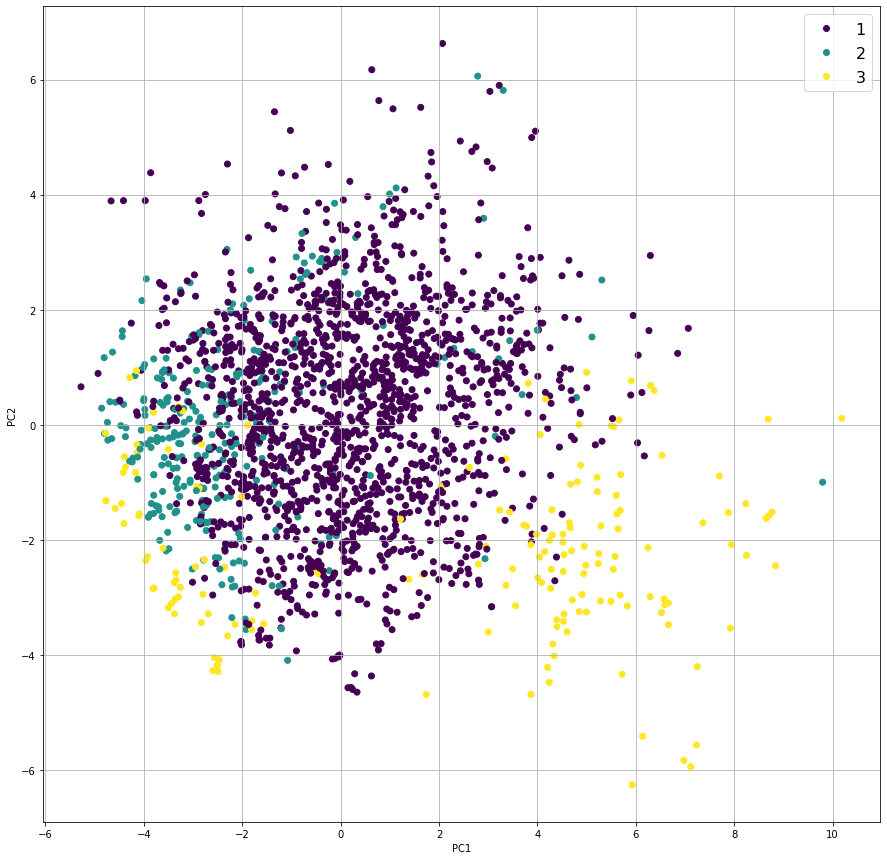

In [6]:
def myplot(score,coeff,labels=None,target_names=None,titulo1='Vista PCA',titulo2='Vista proyeccion var originales'):
     x1 = score[:,0]
     x2 = score[:,1]
     n = coeff.shape[0]

     clases = target_names
     scatter = plt.scatter(x1, x2, c=y, alpha=1) #, cmap=colours)
     plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=19)
     print(scatter.legend_elements())
     plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

         
#Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");


#Grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_, titulos)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

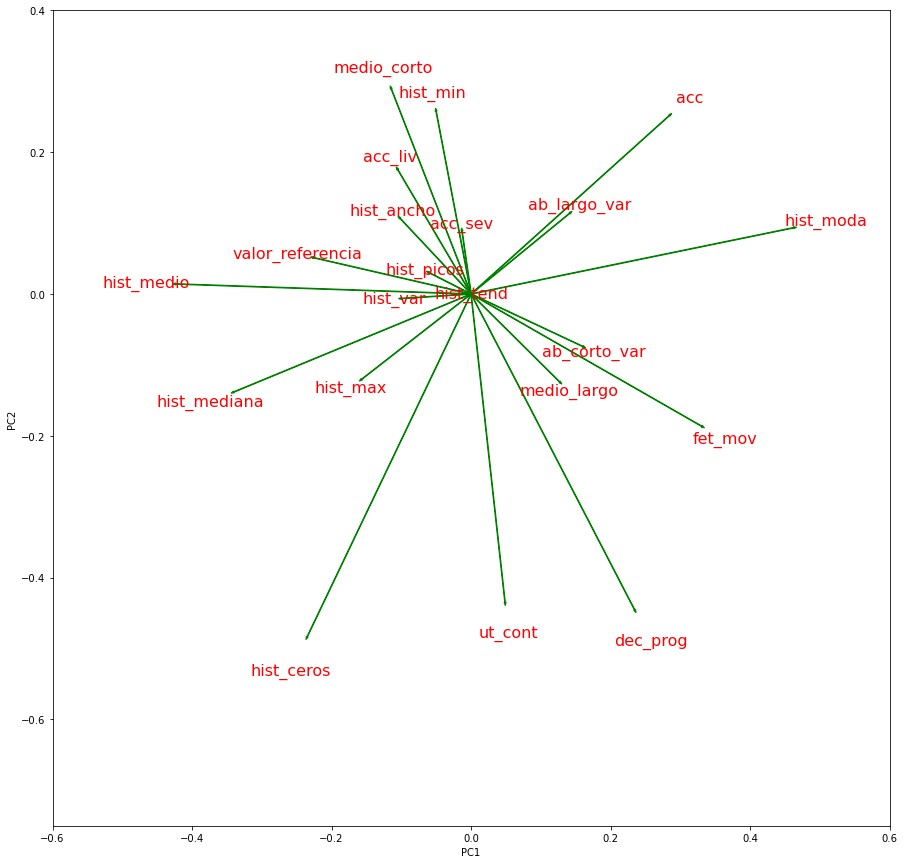

In [7]:
# Definimos el rango de los ejes del grafico
plt.axis([-0.6,0.6,-0.75,0.4])

# Vemos cuantos vectores son las direcciones de maxima varianza
n = pca.components_.shape[0]

# Recorremos esos vectores y los vamos dibujando en el plano
for i in range(n):
    plt.arrow(0, 0, pca.components_[i,0], pca.components_[i,1], color = 'g', alpha = 1);
    # En el extremo de cada vector ponemos en nombre de la columan correspondiente (un poco dezplazados)
    plt.text(pca.components_[i,0]*1.1 , pca.components_[i,1]*1.1, titulos[i], color = 'r', ha = 'center', va = 'center', fontsize=16);

# Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");

# imprimimos el grafico completo
plt.show();

# Clasificador bayesiano ingenuo

In [8]:
#Para empezar convierto de 3 clases a 2, luego retomamos con las 3
for i in range(y.shape[0]):
  if y[i] > 2:
    y[i]=2
print (y)

gnb = GaussianNB() #instancio la clase
modelo_gnb = gnb.fit(X, y) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred = modelo_gnb.predict(X) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta


[2. 1. 1. ... 2. 2. 1.]


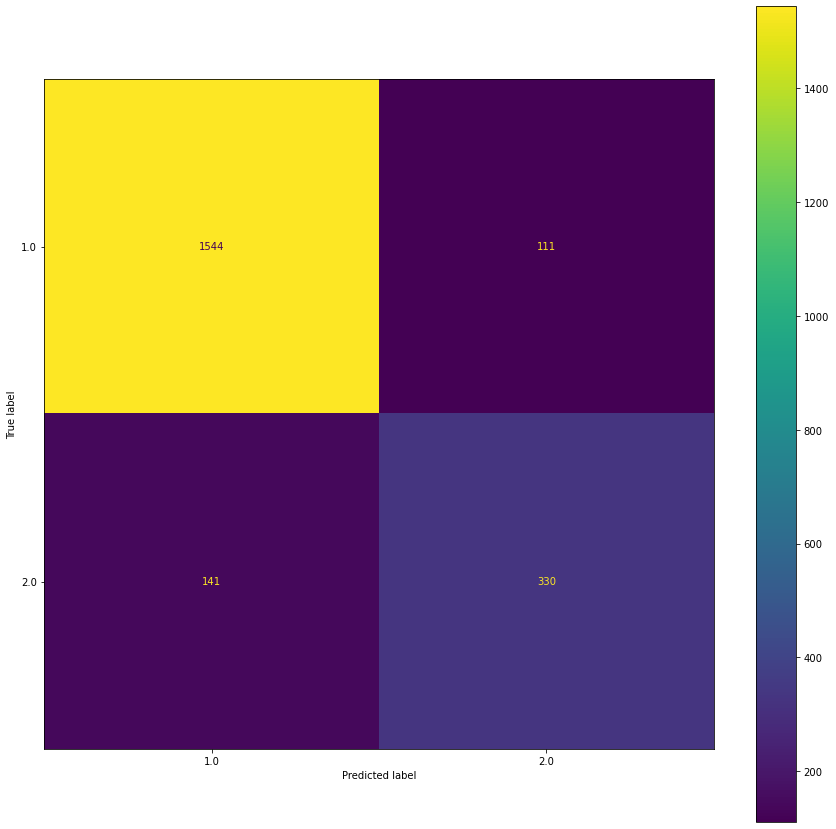

In [9]:
# matriz de confusión
conf = confusion_matrix(y,y_pred)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=gnb.classes_)
disp.plot(values_format='d') 

En este caso el error mas importante es cuando predice normal y realmente es sospechoso, tenemos que bajar esos 141 errores corriendo el margen de desición.

Vamos a ver las metricas para evaluar la clasificación

In [10]:
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)

print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))


Accuracy:  0.88
Recall:  0.93
Precision:  0.92


Aplico componentes principales nuevamente luego de Bayes y grafico

In [11]:
#Aplico Componentes principales
pca = PCA()
pca.fit(X,y_pred)
x_new = pca.transform(X)

([<matplotlib.lines.Line2D object at 0x0000021843B88FA0>, <matplotlib.lines.Line2D object at 0x0000021843B3DA00>], ['$\\mathdefault{1}$', '$\\mathdefault{2}$'])


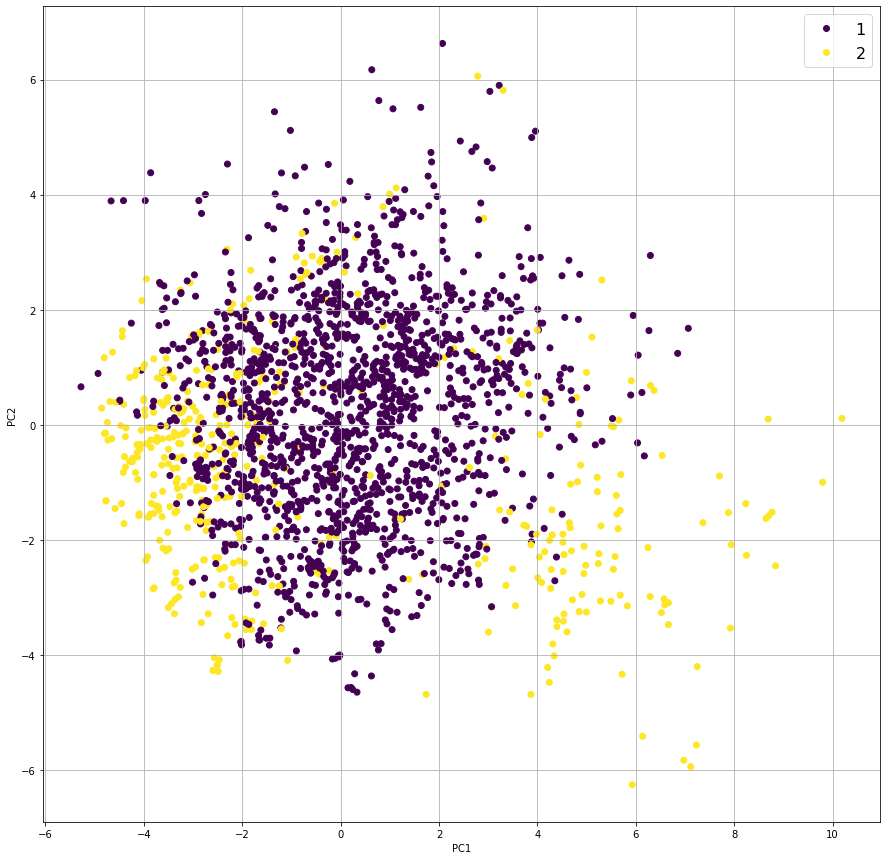

In [12]:
def myplot(score,coeff,labels=None,target_names=None):
     x1 = score[:,0]
     x2 = score[:,1]
     n = coeff.shape[0]

     clases = target_names
     scatter = plt.scatter(x1, x2, c=y, alpha=1) #, cmap=colours)
     plt.legend(handles=scatter.legend_elements()[0], labels=clases, fontsize=19)
     print(scatter.legend_elements())
     plt.legend(handles=scatter.legend_elements()[0], labels=scatter.legend_elements()[1], fontsize=16)

         
#Le ponemos nombre a los ejes
plt.xlabel("PC1");
plt.ylabel("PC2");


#Grafico las primeras dos componentes principales 
myplot(x_new[:,0:2], pca.components_, titulos)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
plt.show()

En este caso vemos que el grafico ahora cuenta con las dos variables luego de simplificar el modelo, la mayoria de los puntos que eran sospechosos pasan a ser normales y esto afecta la efectividad del modelo.

A pesar de esto, volvemos a Bayes y variamos el punto de corte a 0.7 para reevaluar el modelo y comparar los resultados antes de tomar el modelo con tres variables

[[0.004 0.996]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.958 0.042]
 [0.961 0.039]
 [0.934 0.066]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.023 0.977]
 [1.    0.   ]
 [0.178 0.822]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


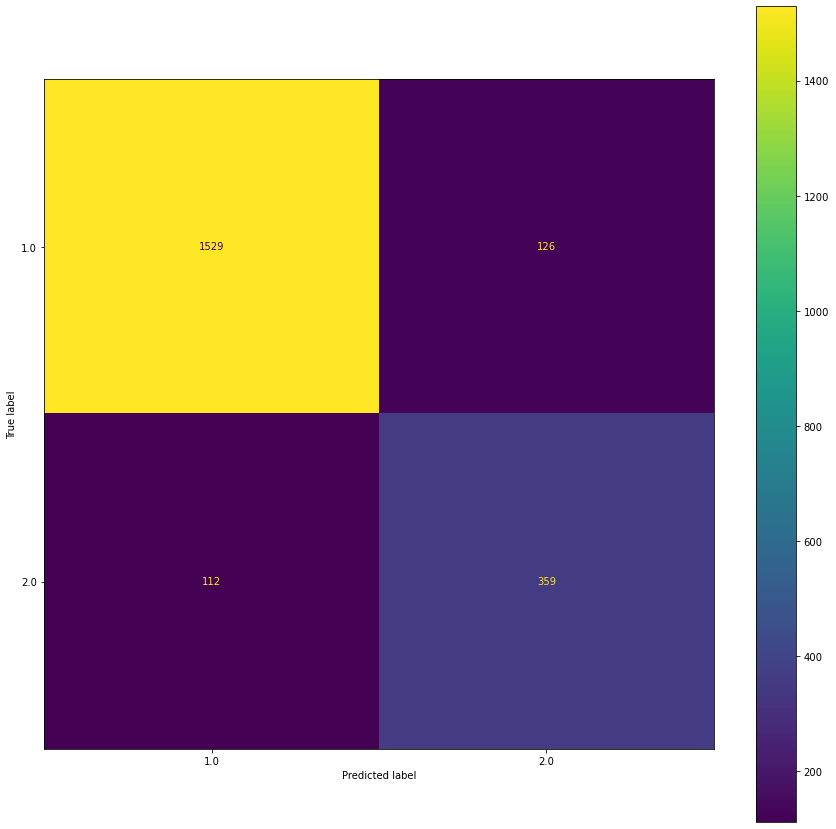

In [13]:
probas = gnb.predict_proba(X) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
with np.printoptions(precision=3, suppress=True):
     print(probas[0:20])

# por ejemplo, por defecto asumo que SÍ tiene caso sospechoso (y=2)
y_pred_07 = np.full(y_pred.shape, 2)

#y si la probabilidad de no tener es mayor a 0.7, lo clasifico como sin riesgo (y=1)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.7):
        y_pred_07[i]=1.


conf_07 = confusion_matrix(y,y_pred_07)

disp_07 = ConfusionMatrixDisplay(confusion_matrix=conf_07, display_labels=gnb.classes_)
disp_07.plot(values_format='d') 

Vamos a ver las metricas para evaluar este nuevo corte


In [14]:
accuracy_07 = accuracy_score(y, y_pred_07)
recall_07 = recall_score(y, y_pred_07)
precision_07 = precision_score(y, y_pred_07)

print('Accuracy: ', round(accuracy_07,2))
print('Recall: ', round(recall_07,2))
print('Precision: ', round(precision_07,2))


Accuracy:  0.89
Recall:  0.92
Precision:  0.93


Subimos el margen a 0.8 ya que sigue dando alta la cantidad de falsos negativos y casi no hay modificacion en las métricas

[[0.004 0.996]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.958 0.042]
 [0.961 0.039]
 [0.934 0.066]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [1.    0.   ]
 [0.023 0.977]
 [1.    0.   ]
 [0.178 0.822]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]]


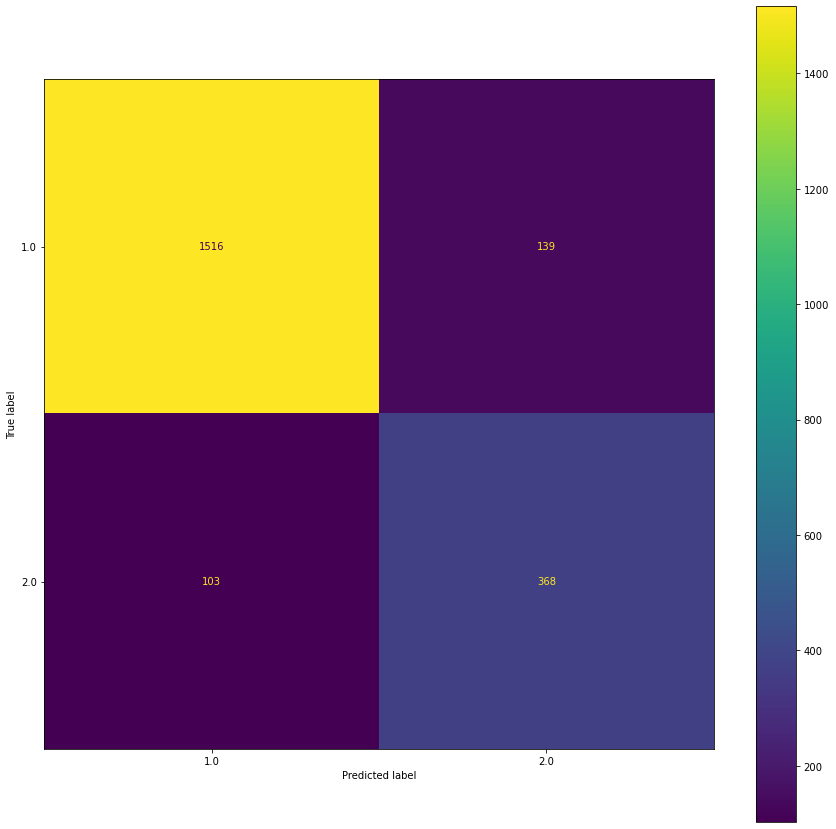

In [15]:
probas_8 = gnb.predict_proba(X) #probabilidades de cada clase según modelo predictivo
# inspecciono esas probabilidades
with np.printoptions(precision=3, suppress=True):
    print(probas_8[0:20])

# por ejemplo, por defecto asumo que SÍ tiene caso sospechoso (y=2)
y_pred_08 = np.full(y_pred.shape, 2)

#y si la probabilidad de no tener es mayor a 0.8, lo clasifico como sin riesgo (y=1)
for i in range(probas_8.shape[0]):
    if (probas_8[i,0]>0.8):
        y_pred_08[i]=1.


conf_08 = confusion_matrix(y,y_pred_08)

disp_08 = ConfusionMatrixDisplay(confusion_matrix=conf_08, display_labels=gnb.classes_)
disp_08.plot(values_format='d') 

Vamos a ver las metricas para evaluar este nuevo corte en 0.8

In [16]:
accuracy_08 = accuracy_score(y, y_pred_08)
recall_08 = recall_score(y, y_pred_08)
precision_08 = precision_score(y, y_pred_08)

print('Accuracy: ', round(accuracy_08,2))
print('Recall: ', round(recall_08,2))
print('Precision: ', round(precision_08,2))


Accuracy:  0.89
Recall:  0.92
Precision:  0.94


Con este corte logramos disminuir los falsos negativos y aumentar el recall y precision. 

Ahora voy a intentar analizarlo dejando las 3 dimensiones.
Primero vuelvo a cargar los datos para no tener limitada la y a dos valores

In [17]:
#Salud Fetal
datos = np.genfromtxt('./salud_fetal.csv',delimiter=',', skip_header=1) 

#Recupero la primera fila para tener los nombres de las columnas y lo imprimo

titulos = np.loadtxt('./salud_fetal.csv',
                     delimiter=",", max_rows=1, dtype=str)

print (titulos)

X = datos[:,0:-1]
print(X.shape)
print(X[0:5,:])

y = datos[:,-1]
print(y.shape)
print(y[0:10])


['valor_referencia' 'acc' 'fet_mov' 'ut_cont' 'acc_liv' 'acc_sev'
 'dec_prog' 'ab_corto_var' 'medio_corto' 'ab_largo_var' 'medio_largo'
 'hist_ancho' 'hist_min' 'hist_max' 'hist_picos' 'hist_ceros' 'hist_moda'
 'hist_medio' 'hist_mediana' 'hist_var' 'hist_tend' 'salud_feto']
(2126, 21)
[[120.    0.    0.    0.    0.    0.    0.   73.    0.5  43.    2.4  64.
   62.  126.    2.    0.  120.  137.  121.   73.    1. ]
 [132.    6.    0.    6.    3.    0.    0.   17.    2.1   0.   10.4 130.
   68.  198.    6.    1.  141.  136.  140.   12.    0. ]
 [133.    3.    0.    8.    3.    0.    0.   16.    2.1   0.   13.4 130.
   68.  198.    5.    1.  141.  135.  138.   13.    0. ]
 [134.    3.    0.    8.    3.    0.    0.   16.    2.4   0.   23.  117.
   53.  170.   11.    0.  137.  134.  137.   13.    1. ]
 [132.    7.    0.    8.    0.    0.    0.   16.    2.4   0.   19.9 117.
   53.  170.    9.    0.  137.  136.  138.   11.    1. ]]
(2126,)
[2. 1. 1. 1. 1. 3. 3. 3. 3. 3.]


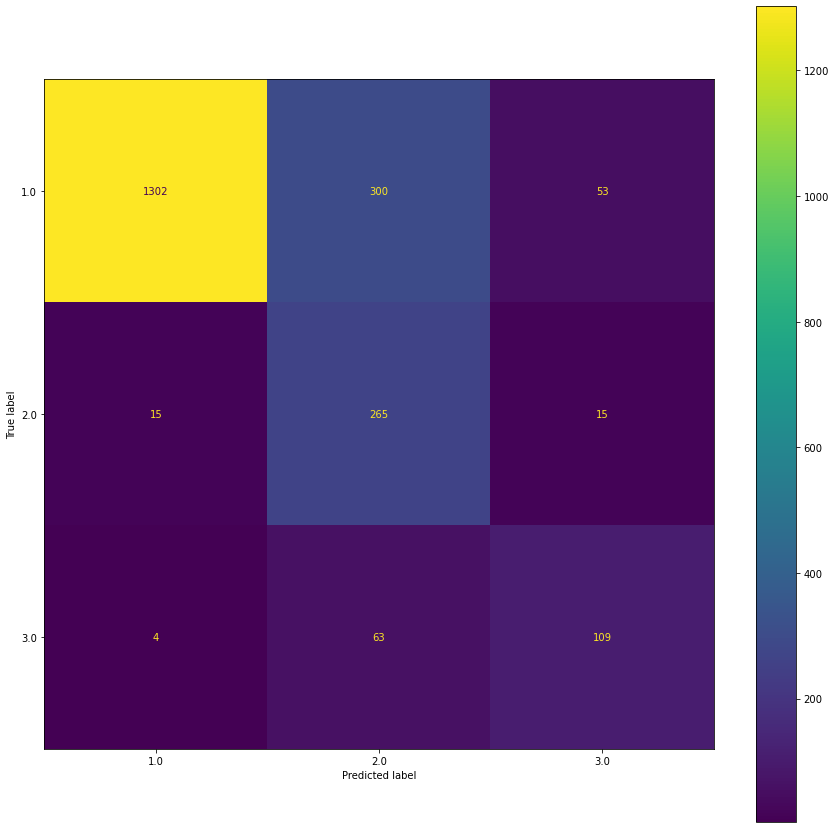

In [18]:
gnb = GaussianNB() #instancio la clase
modelo_gnb = gnb.fit(X, y) #entreno modelo predictivo a partir de los datos, es decir construyo en borde de decisión
y_pred_3 = modelo_gnb.predict(X) #clasifico según modelo. Por defecto clasifica según la clase con probablidad más alta

# matriz de confusión
conf = confusion_matrix(y,y_pred_3)

# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=gnb.classes_)
disp.plot(values_format='d') 

En este caso hay tres sectores donde los datos mal clasificados tienen mayor gravedad, por orden serían:

Cuando es patologico y da normal (4 casos)

cuando es patológico y da sospechoso (63 casos)

cuando es sospechoso y da normal (15 casos)

Vamos a evaluar las metricas en el modelo con las tres variables con el punto de corte por defecto

In [19]:
accuracy_3 = accuracy_score(y, y_pred_3)
recall_3 = recall_score(y, y_pred_3, average='macro')
precision_3 = precision_score(y, y_pred_3, average='macro')

print('Accuracy: ', round(accuracy_3,2))
print('Recall: ', round(recall_3,2))
print('Precision: ', round(precision_3,2))


Accuracy:  0.79
Recall:  0.77
Precision:  0.67


Al tratar de obtener recall y precision daba un error que solo se soluciona agregando el averange, como el resultado depende de la variable que le ponga y no me queda claro que significa voy a obtener las metricas de cada clase por separado para poder ver el funcionamiento del modelo

In [20]:
#calculo recall y precision por cada clase
recall_clase_1,recall_clase_2,recall_clase_3 = recall_score(y, y_pred_3, average=None)
precision_clase_1,precision_clase_2,precision_clase_3 = precision_score(y, y_pred_3, average=None)


print("Recall clase 1", round(recall_clase_1,2))
print("Recall clase 2", round(recall_clase_2,2))
print("Recall clase 3", round(recall_clase_3,2))
print("Precision clase 1", round(precision_clase_1,2))
print("Precision clase 2", round(precision_clase_2,2))
print("Precision clase 3", round(precision_clase_3,2))

Recall clase 1 0.79
Recall clase 2 0.9
Recall clase 3 0.62
Precision clase 1 0.99
Precision clase 2 0.42
Precision clase 3 0.62


Vamos a mover los margenes para reevaluar como clasifica cada dato, optamos primero por un esquema más conservador, que tome todo como patologico salvo que la probabilidad de que sea normal supere el 70% o el sospechoso el 60%

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


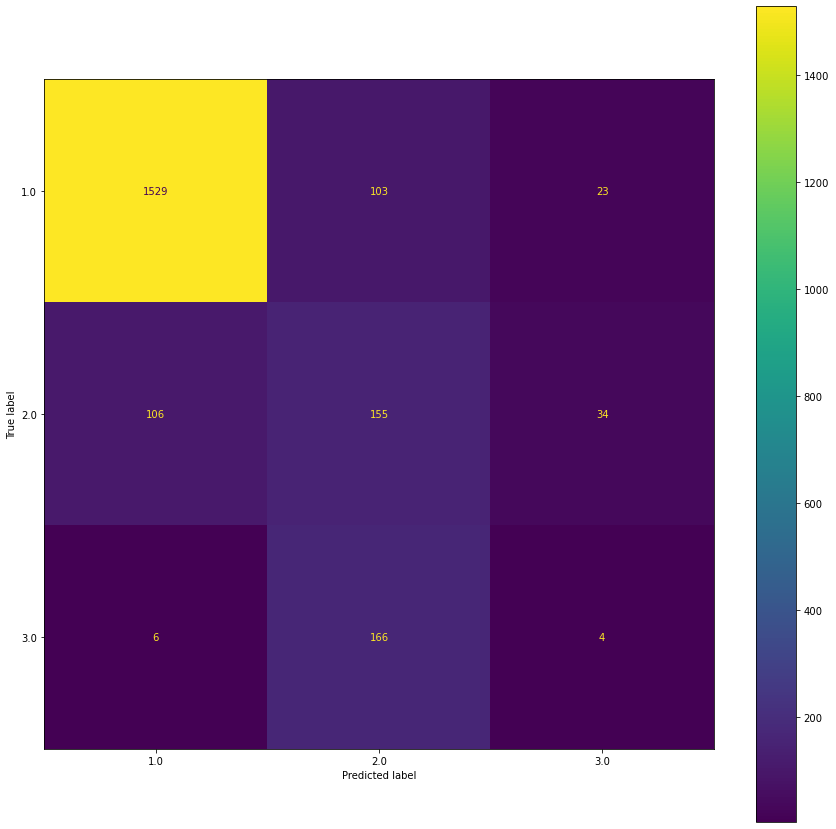

In [21]:
# asumo que el feto SI tiene un problema (sospechoso/patologico) (y=3)
y_pred_3c_07 = np.full(y_pred.shape, fill_value=3)

print(y_pred_3c_07[0:30])

#si la probabilidad de no tener es mayor a 0.7, lo clasifico como normal (y=1)
for i in range(probas.shape[0]):
    if (probas[i,0]>0.7):
        y_pred_3c_07[i]=1

# si la probabilidad de ser sospechoso es mayor a 0.6, lo clasifico como y=2
    else:
        if (probas[i,1]>0.6):
            y_pred_3c_07[i]=2.
            
conf_3c_07 = confusion_matrix(y,y_pred_3c_07)

disp_3c_07 = ConfusionMatrixDisplay(confusion_matrix=conf_3c_07, display_labels=gnb.classes_)
disp_3c_07.plot(values_format='d') 

In [22]:
accuracy_3c_07 = accuracy_score(y, y_pred_3c_07)
recall_3c_07 = recall_score(y, y_pred_3c_07, average='macro')
precision_3c_07 = precision_score(y, y_pred_3c_07, average='macro')

print('Accuracy: ', round(accuracy_3c_07,2))
print('Recall: ', round(recall_3c_07,2))
print('Precision: ', round(precision_3c_07,2))

Accuracy:  0.79
Recall:  0.49
Precision:  0.45


In [23]:
#calculo recall y precision por cada clase
recall_clase_1_07,recall_clase_2_07,recall_clase_3_07 = recall_score(y, y_pred_3c_07, average=None)
precision_clase_1_07,precision_clase_2_07,precision_clase_3_07 = precision_score(y, y_pred_3c_07, average=None)


print("Recall clase 1", round(recall_clase_1_07,2))
print("Recall clase 2", round(recall_clase_2_07,2))
print("Recall clase 3", round(recall_clase_3_07,2))
print("Precision clase 1", round(precision_clase_1_07,2))
print("Precision clase 2", round(precision_clase_2_07,2))
print("Precision clase 3", round(precision_clase_3_07,2))

Recall clase 1 0.92
Recall clase 2 0.53
Recall clase 3 0.02
Precision clase 1 0.93
Precision clase 2 0.37
Precision clase 3 0.07


Este formato mas conservador da resultados de clasificación sensiblemente peores, afecta mucho la clasificacion correcta de la clase 2 y 3  
En el caso de la clase 3 al mover los limites de cada una de las otras clases, baja muchisimo la clasificación y deja los indicadores practicamente en cero, por lo cual el mejor modelo aplicable es el que da los ajustes por defecto  
Independientemente de los datos de la métrica, el analisis va centrado en la cantidad de datos mal clasificados en los escenarios considerados más sensibles que son los patologicos (clase 3)